In [43]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('titanic.csv', index = False)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
titanic_df = titanic

In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
missing_values = titanic_df.isnull().sum() #결측값 확인
missing_columns = missing_values[missing_values > 0]

print(missing_columns)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


<h2> 결측치 제거 </h2>


In [47]:
titanic_df['age']=titanic_df['age'].fillna(titanic_df['age'].median()) #나이는 중앙값으로 대체

frequent_embarked = titanic_df['embarked'].mode()[0] #최빈값 확인
titanic_df['embarked']=titanic_df['embarked'].fillna(frequent_embarked) # embarked는 최빈값으로 대체

#deck, embarked_town도 동일한 작업 실행
frequent_deck = titanic_df['deck'].mode()[0]
titanic_df['deck']=titanic_df['deck'].fillna(frequent_deck)

frequent_embark_town = titanic_df['embark_town'].mode()[0]
titanic_df['embark_town']=titanic_df['embark_town'].fillna(frequent_embark_town)

In [48]:
missing_values = titanic_df.isnull().sum() #결측값 확인
missing_columns = missing_values[missing_values > 0]

print(missing_columns)

Series([], dtype: int64)


In [49]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<h2> 남녀 승객의 생존율을 pie차트(matplotlib)로 그리기 </h2>

*   남성 생존율 : 남성 전체 중 18.9%
*   여성 생존율 : 여성 전체 중 74.2%

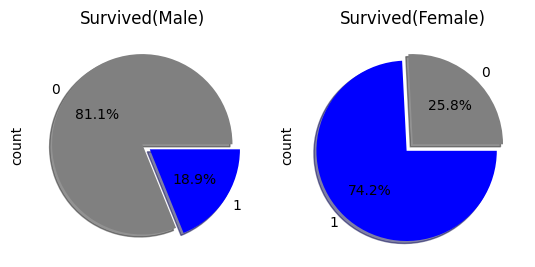

In [82]:
import matplotlib.pyplot as plt

#blue: 생존율, grey: 사망율
color=['grey','blue']

# print(titanic_df['survived'][titanic_df['sex']=='male'].value_counts().reindex([0, 1], fill_value=0))
# print(titanic_df['survived'][titanic_df['sex']=='female'].value_counts().reindex([0, 1], fill_value=0))

#원형차트
plt.subplot(1,2,1)
titanic_df['survived'][titanic_df['sex']=='male'].value_counts().reindex([0, 1], fill_value=0).plot.pie(explode=[0,0.1], colors=color, autopct='%.1f%%', shadow=True)
plt.title('Survived(Male)')

plt.subplot(1,2,2)
titanic_df['survived'][titanic_df['sex']=='female'].value_counts().reindex([0, 1], fill_value=0).plot.pie(explode=[0,0.1], colors=color, autopct='%.1f%%', shadow=True)
plt.title('Survived(Female)')

plt.show()

<h2> 객실 등급(pclass)별 생존자 수 막대그래프(seaborn)로 그리기 </h2>

<ipython-input-55-f181339cd31c>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='pclass',hue='survived',data=titanic, palette=palette1)


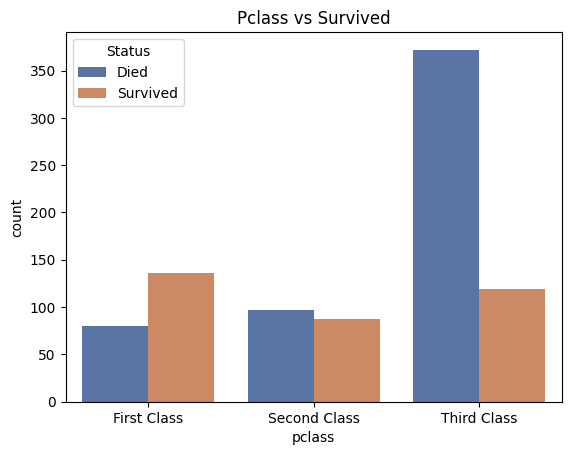

In [55]:
palette1 = sns.color_palette('deep')

ax = sns.countplot(x='pclass',hue='survived',data=titanic, palette=palette1)

# x축 레이블 지정
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'])

# 범례 설정
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Died', 'Survived'], title='Status')

plt.title('Pclass vs Survived')
plt.show()

<ipython-input-68-ea5e865aee3c>:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  fg = sns.catplot(x='pclass',


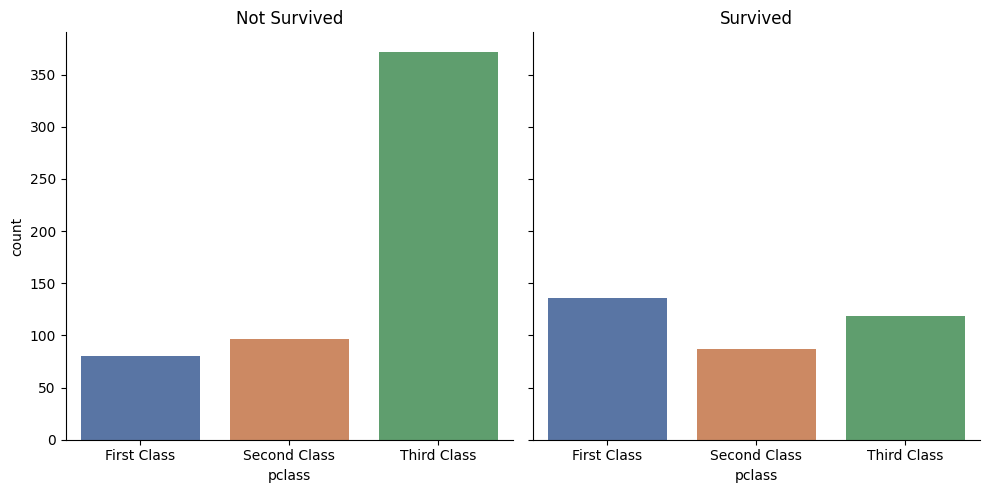

In [68]:
fg = sns.catplot(x='pclass',
                 hue='pclass',
                 col='survived',
                 kind='count',
                 data=titanic,
                 palette=palette1,
                 legend=False)

# FacetGrid를 통해 각 패널의 x축 레이블 설정
fg.set_xticklabels(['First Class', 'Second Class', 'Third Class'])

# col_title 설정
titles = ["Not Survived", "Survived"]
for ax, title in zip(fg.axes.flat, titles):
    ax.set_title(title)

plt.show()

<h2> 타이타닉호 승객의 속성과 생존 사이에 상관관계(Correlation) 분석 </h2>

*   피어슨 상관계수 사용
*   +1(양의 상관관계), 0(상관없음), -1(음의 상관관계)





In [70]:
titanic_numeric = titanic_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']]
titanic_corr = titanic_numeric.corr(method='pearson')
titanic_corr.to_csv('titanic_corr.csv',index=False)

titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<h2> 산점도(pairplot) </h2>

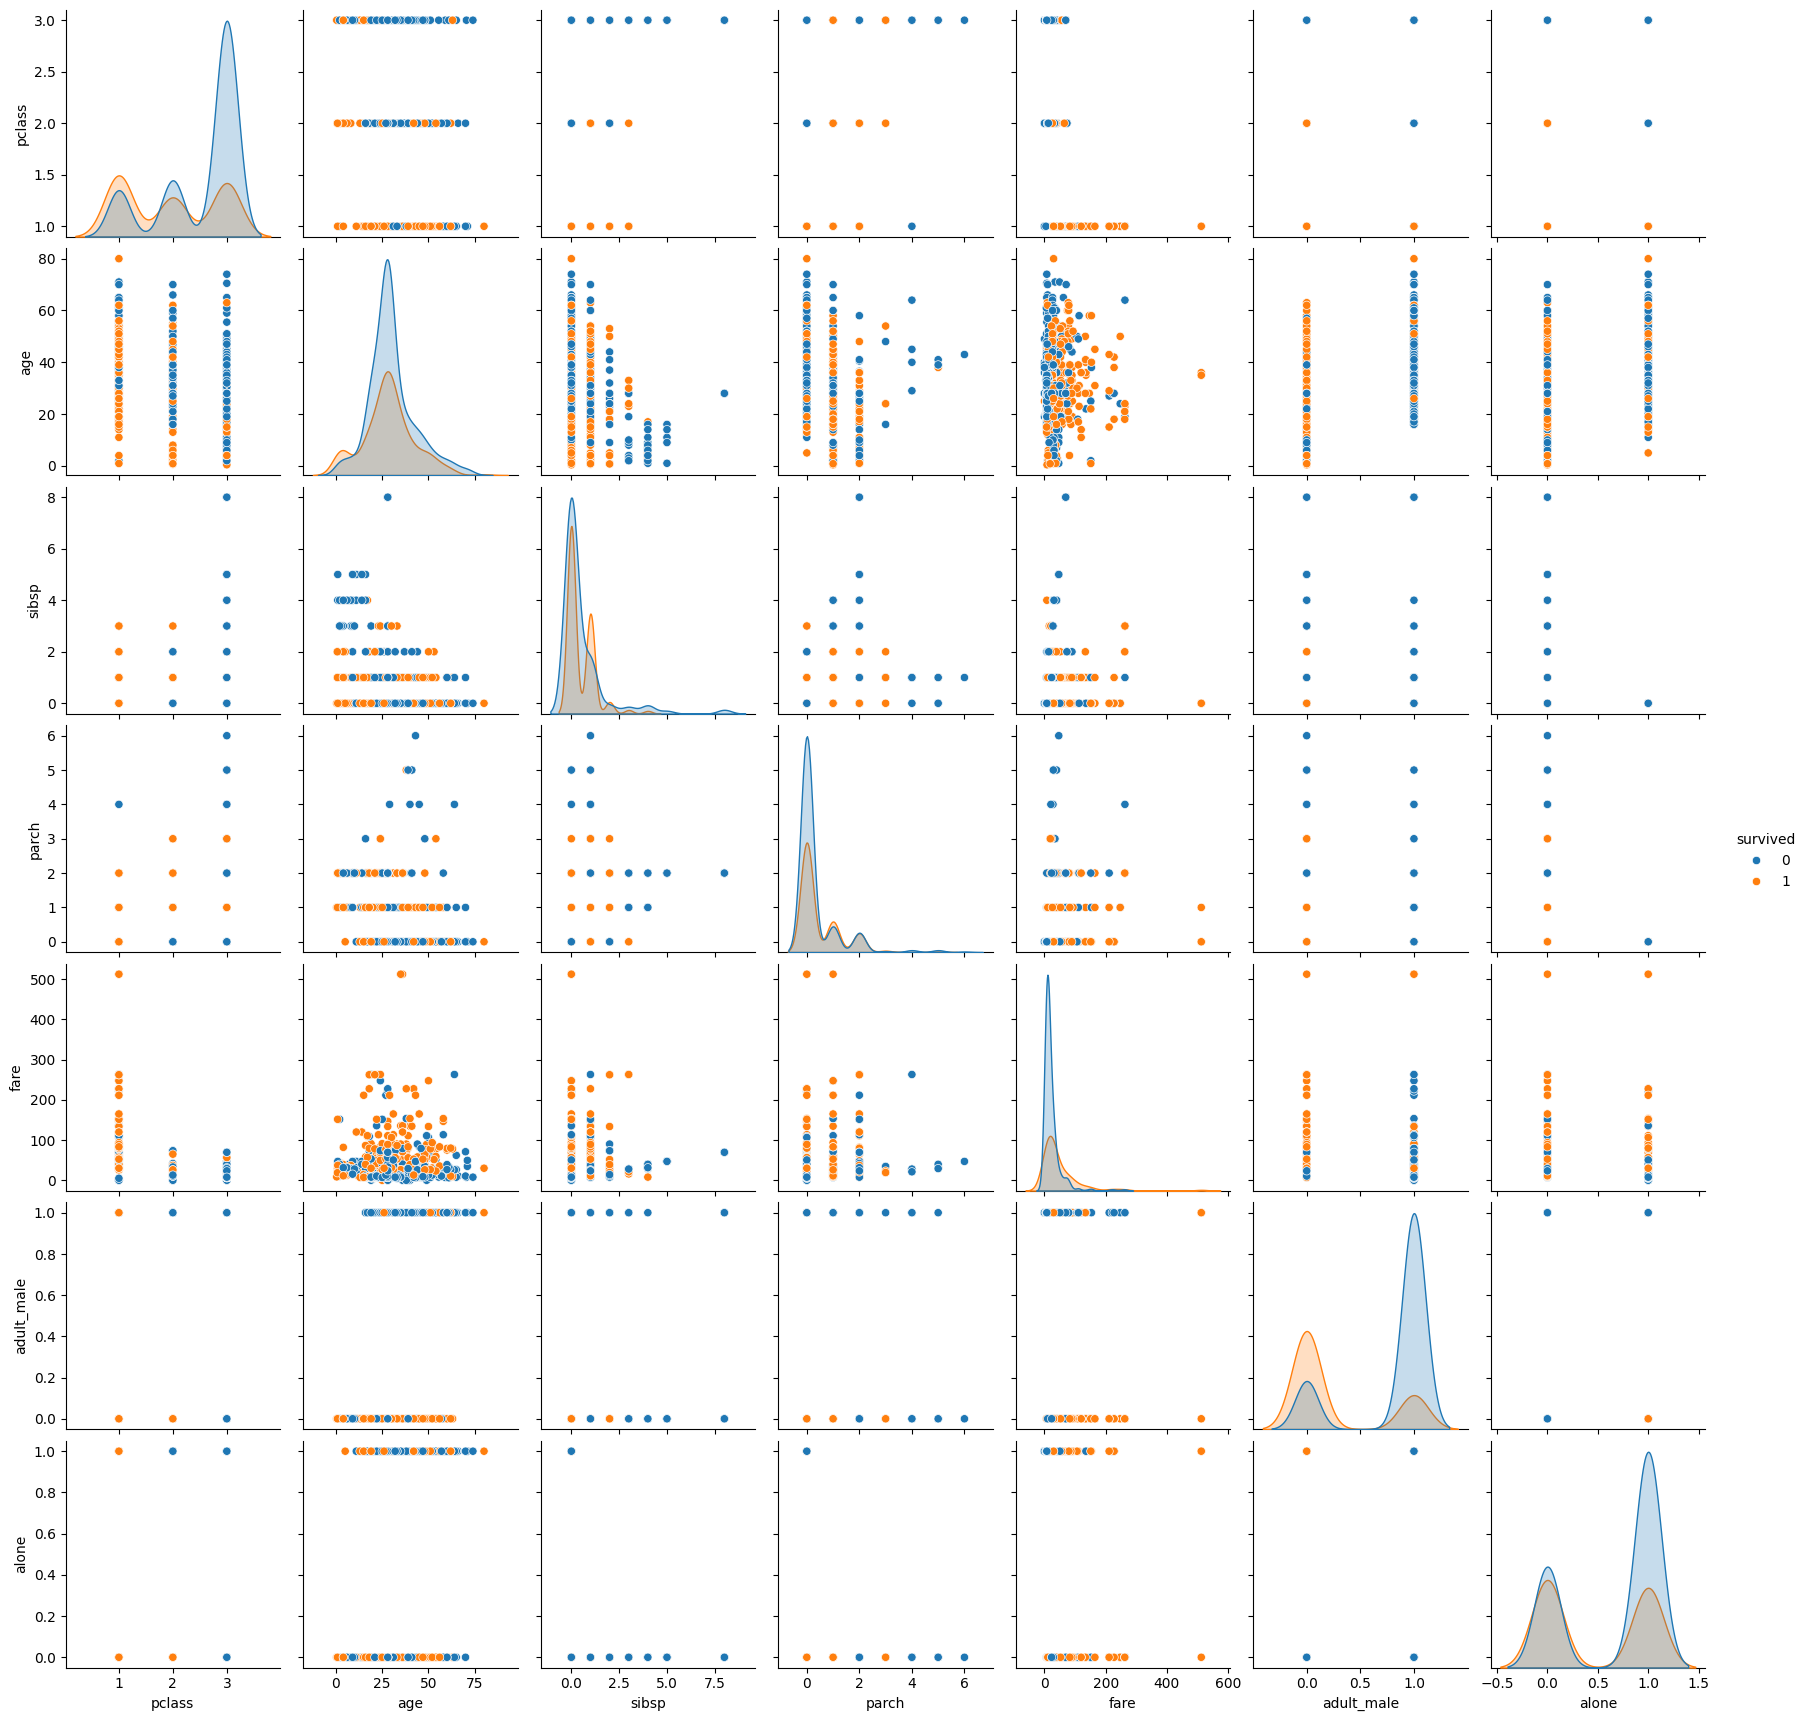

In [71]:
sns.pairplot(titanic_df, hue='survived')
plt.show()

<h2> 상관관계 결과 시각화(point) </h2>

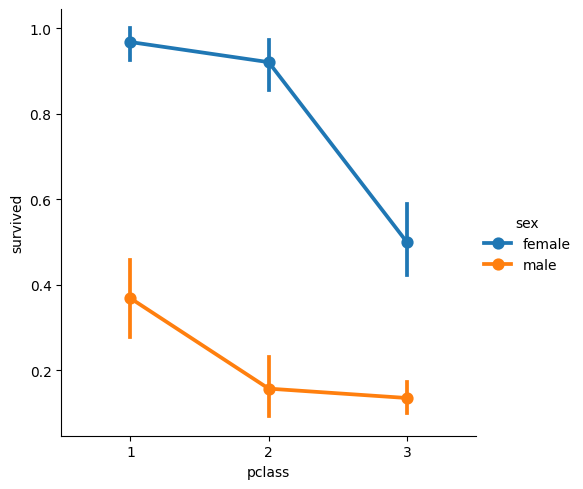

In [74]:
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

<h2> 좌석 등급별 남,녀 survived 비율 파이 그래프 </h2>

In [85]:
print(titanic_df['pclass'].unique())

[3 1 2]


In [92]:
#한글 폰트 설정

import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Text(0.5, 1.0, '3등급 남녀 사망자 비율')

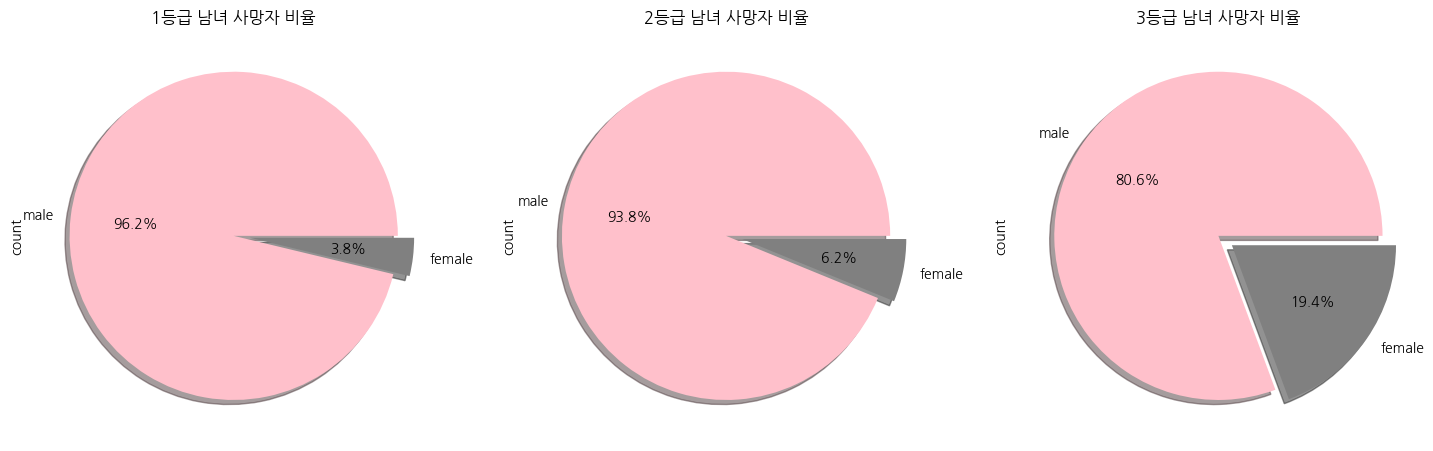

In [97]:
#pink: 남자비율, grey: 여자비율
color=['pink','grey']

# 한 이미지에 세 개의 차트를 그리기 위해 subplot 사용
plt.figure(figsize=(18, 6))  # 전체 그림 크기 설정

# 1등석 남녀 사망 비율
plt.subplot(1, 3, 1)
first_class_died = titanic_df[(titanic_df['pclass'] == 1) & (titanic_df['survived'] == 0)]
gender_counts = first_class_died['sex'].value_counts()

gender_counts.plot.pie(explode=[0,0.1], colors=color, autopct='%.1f%%', shadow=True)
plt.title('1등급 남녀 사망자 비율')

# 2등석 남녀 사망 비율
plt.subplot(1, 3, 2)
second_class_died = titanic_df[(titanic_df['pclass'] == 2) & (titanic_df['survived'] == 0)]
gender_counts = second_class_died['sex'].value_counts()

gender_counts.plot.pie(explode=[0,0.1], colors=color, autopct='%.1f%%', shadow=True)
plt.title('2등급 남녀 사망자 비율')

# 3등석 남녀 사망 비율
plt.subplot(1, 3, 3)
third_class_died = titanic_df[(titanic_df['pclass'] == 3) & (titanic_df['survived'] == 0)]
gender_counts = third_class_died['sex'].value_counts()

gender_counts.plot.pie(explode=[0,0.1], colors=color, autopct='%.1f%%', shadow=True)
plt.title('3등급 남녀 사망자 비율')